---
layout: post
title:  "Plotting 5 Most Popular Languages on AO3"
date:   2021-05-11
category: visualization
tags: Python Seaborn barplot
---

* Table of Contents
{:toc}

# Data Cleaning

Let's quickly go over how we load file, select column, and find the 5 most popular languages on AO3. For detailed explanations of what's going on, check out previous posts on this subject.

In [2]:
# Load Python library
import pandas as pd

# Load file
path="/home/pi/Downloads/works-20210226.csv"
chunker = pd.read_csv(path, chunksize=10000)
works = pd.concat(chunker, ignore_index=True)

# Select language col, drop na values, count frequencies of each language
top = works.language.dropna().value_counts().reset_index()
top.columns = ['language', 'work_count']

# Choose top 5 most popular languages
top5 = top[:5].copy()
top5

,language,work_count
0,en,6587693
1,zh,335179
2,ru,136724
3,es,70645
4,fr,32145


# Simple Bar Plot

We use Seaborn library to plot the data into a simple bar plot.

In [3]:
# Import libraries
# Top line is Jupyter Notebook specific

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

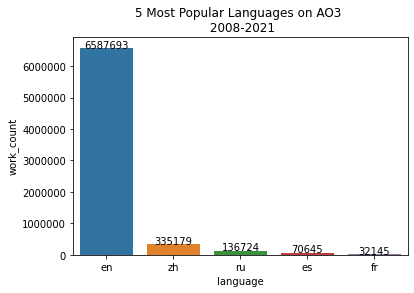

In [17]:
# Plot using Seaborn library
ax = sns.barplot(x="language", y="work_count", data=top5)

# Add title
ax.set_title("5 Most Popular Languages on AO3 \n 2008-2021")

# Prevent scientific notation with ticklabel_format()
ax.ticklabel_format(style='plain', axis='y')

# Add number annotation
for i in range(0,5):
    ax.annotate(str(top5['work_count'][i]), xy=(i,top5['work_count'][i]), horizontalalignment="center")